In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [6]:
%%time
# import shapefile using geopandas
plot_locations = gpd.read_file('../input/kolkata/landuse.shp')

Wall time: 176 ms


In [7]:
plot_locations

,osm_id,name,type,geometry
0,35873641,Ramkrishna Mission Institute of Culture,commercial,"POLYGON ((88.36625 22.51587, 88.36617 22.51562..."
1,51765872,None,railway,"POLYGON ((88.37139 22.56633, 88.37134 22.56643..."
2,52097603,Fort William,military,"POLYGON ((88.33839 22.56303, 88.34024 22.56255..."
3,52152010,AA Block,residential,"POLYGON ((88.39708 22.59004, 88.39684 22.58991..."
4,52152062,AD Block,residential,"POLYGON ((88.40512 22.59495, 88.40519 22.59490..."
...,...,...,...,...
2534,1120791170,None,flowerbed,"POLYGON ((88.49139 22.56136, 88.49140 22.56136..."
2535,1125831231,None,farmland,"POLYGON ((88.49101 22.55628, 88.49114 22.55621..."
2536,1131229990,Sakhawat Memorial Govt. Girls' High School,education,"POLYGON ((88.34902 22.54442, 88.34907 22.54488..."
2537,1132236767,Basant Bahar Housing Complex,residential,"POLYGON ((88.37835 22.51636, 88.37862 22.51628..."


In [8]:
plot_locations.type.value_counts()

Polygon    2539
dtype: int64

In [9]:
commercial = plot_locations[plot_locations["type"] == "commercial"]

In [10]:
len(commercial)

133

In [11]:
commercial

,osm_id,name,type,geometry
0,35873641,Ramkrishna Mission Institute of Culture,commercial,"POLYGON ((88.36625 22.51587, 88.36617 22.51562..."
10,101745728,None,commercial,"POLYGON ((88.34935 22.58136, 88.35042 22.58348..."
13,101745731,None,commercial,"POLYGON ((88.35145 22.58608, 88.35051 22.58355..."
18,101750934,None,commercial,"POLYGON ((88.35111 22.58964, 88.35227 22.58932..."
21,101757258,None,commercial,"POLYGON ((88.35152 22.57451, 88.35127 22.57395..."
...,...,...,...,...
2117,513994267,"Amity University, Kolkata",commercial,"POLYGON ((88.48685 22.59551, 88.48690 22.59537..."
2296,669520288,Ichapur Post Office,commercial,"POLYGON ((88.30594 22.59253, 88.30593 22.59246..."
2298,671070032,arts acre,commercial,"POLYGON ((88.52040 22.54975, 88.52069 22.55003..."
2414,1009083553,Rosedale Plaza,commercial,"POLYGON ((88.48983 22.56151, 88.49070 22.56103..."


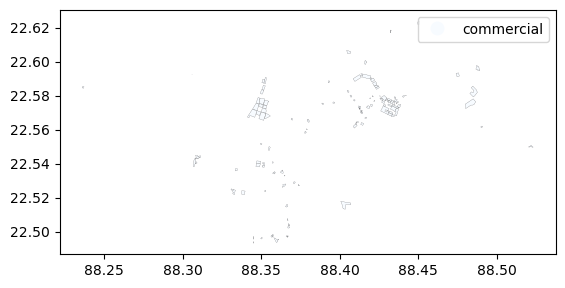

In [12]:
ax = commercial.plot(
    column="type",  # Data to plot
    cmap="Blues",  # Color palette
    edgecolor="k",  # Borderline color
    linewidth=0.1,  # Borderline width
    legend=True,  # Add legend
    legend_kwds={
        "fmt": "{:.0f}"
    },  # Remove decimals in legend (for legibility)
)

In [13]:
plot_locations = gpd.read_file('../input/kolkata/buildings.shp')

In [14]:
plot_locations["type"].value_counts().head(15)

residential         1960
apartments          1071
house                290
detached             113
place_of_worship      84
commercial            81
school                60
office                36
industrial            35
hospital              32
college               28
hostel                26
retail                25
stadium               22
bank                  20
Name: type, dtype: int64

In [15]:
school = plot_locations[plot_locations["type"] == "school"]

In [16]:
len(school)

60

In [17]:
school.explore(column="name", # make choropleth based on "BoroName" column
     tooltip="name", # show "BoroName" value in tooltip (on hover)
     popup=True, # show all values in popup (on click)
     tiles="CartoDB positron", # use "CartoDB positron" tiles
     cmap="Set1", # use "Set1" matplotlib colormap
     style_kwds=dict(color="black") )

In [18]:
%%time
# import shapefile using geopandas
plot_locations = gpd.read_file('../input/roads_railways/gis_osm_roads_free_1.shp')

Wall time: 2min 45s


In [19]:
plot_locations.columns

Index(['osm_id', 'code', 'fclass', 'name', 'ref', 'oneway', 'maxspeed',
       'layer', 'bridge', 'tunnel', 'geometry'],
      dtype='object')

In [20]:
plot_locations.head()

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry
0,3187224,5115,tertiary,Sha Road,None,B,0,0,F,F,"LINESTRING (76.32194 10.30471, 76.32174 10.304..."
1,3191425,5115,tertiary,U2,None,B,0,0,F,F,"LINESTRING (76.33476 10.30725, 76.33477 10.306..."
2,3191428,5115,tertiary,Transport Bustand Road,None,B,0,0,F,F,"LINESTRING (76.33261 10.29997, 76.33282 10.300..."
3,3191437,5115,tertiary,Housing Board,None,B,0,0,F,F,"LINESTRING (76.33261 10.29997, 76.33327 10.299..."
4,3194810,5115,tertiary,Market Road,None,B,0,0,F,F,"LINESTRING (76.33898 10.30246, 76.33906 10.305..."


In [21]:
plot_locations.fclass.value_counts()

residential       1090574
unclassified       364722
tertiary           170112
service            134419
track               56382
trunk               49761
secondary           49227
primary             40863
path                38625
living_street       38612
footway             23129
unknown             19872
track_grade3         6447
trunk_link           5607
steps                3663
track_grade2         3433
tertiary_link        2876
motorway             2544
primary_link         2378
pedestrian           2286
track_grade1         1843
secondary_link       1556
motorway_link         904
track_grade5          561
track_grade4          522
cycleway              461
bridleway             306
Name: fclass, dtype: int64

In [22]:
max = 0
min = 0

In [23]:
for x in (plot_locations[plot_locations.name == "Vidyasagar Setu"].iloc[0].geometry).coords:
    print(x[0],x[1])

88.3319469 22.5508633
88.3322859 22.5515228
88.3323883 22.5518062
88.3324469 22.5521272
88.3324509 22.5523702
88.3324254 22.5525929
88.3323871 22.5528338
88.332301 22.5531003
88.332081 22.5534666
88.3318243 22.5537991
88.3299256 22.5553276
88.3251291 22.559038


In [24]:
plot_locations[plot_locations.name == "Vidyasagar Setu"].iloc[0].geometry.bounds

(88.3251291, 22.5508633, 88.3324509, 22.559038)

In [25]:
plot_locations[plot_locations.name == "Vidyasagar Setu"].explore()

In [26]:
plot_locations[plot_locations.name == "Vidyasagar Setu"].sindex.query(box(88.3319469, 22.550, 88.33219469, 22.551))

NameError: name 'box' is not defined

In [ ]:
from shapely.geometry import box

In [ ]:
plot_locations[plot_locations.name == "Vidyasagar Setu"].sindex.query(box(88.32, 22.550, 88.33, 22.553),predicate="contains")

In [ ]:
%%time
# import shapefile using geopandas
plot_locations = gpd.read_file('../input/roads_railways/gis_osm_railways_free_1.shp')

In [ ]:
plot_locations.sindex.query(box(88.00,22.550, 88.33, 22.56),predicate="contains")

In [ ]:
mx = plot_locations.iloc[plot_locations.sindex.query(box(88.00,22.550, 88.33, 22.56),predicate="contains")]

In [ ]:
mx.explore(column="name", # make choropleth based on "BoroName" column
     tooltip="name", # show "BoroName" value in tooltip (on hover)
     popup=True, # show all values in popup (on click)
     tiles="CartoDB positron", # use "CartoDB positron" tiles
     cmap="Set1", # use "Set1" matplotlib colormap
     style_kwds=dict(color="black") )